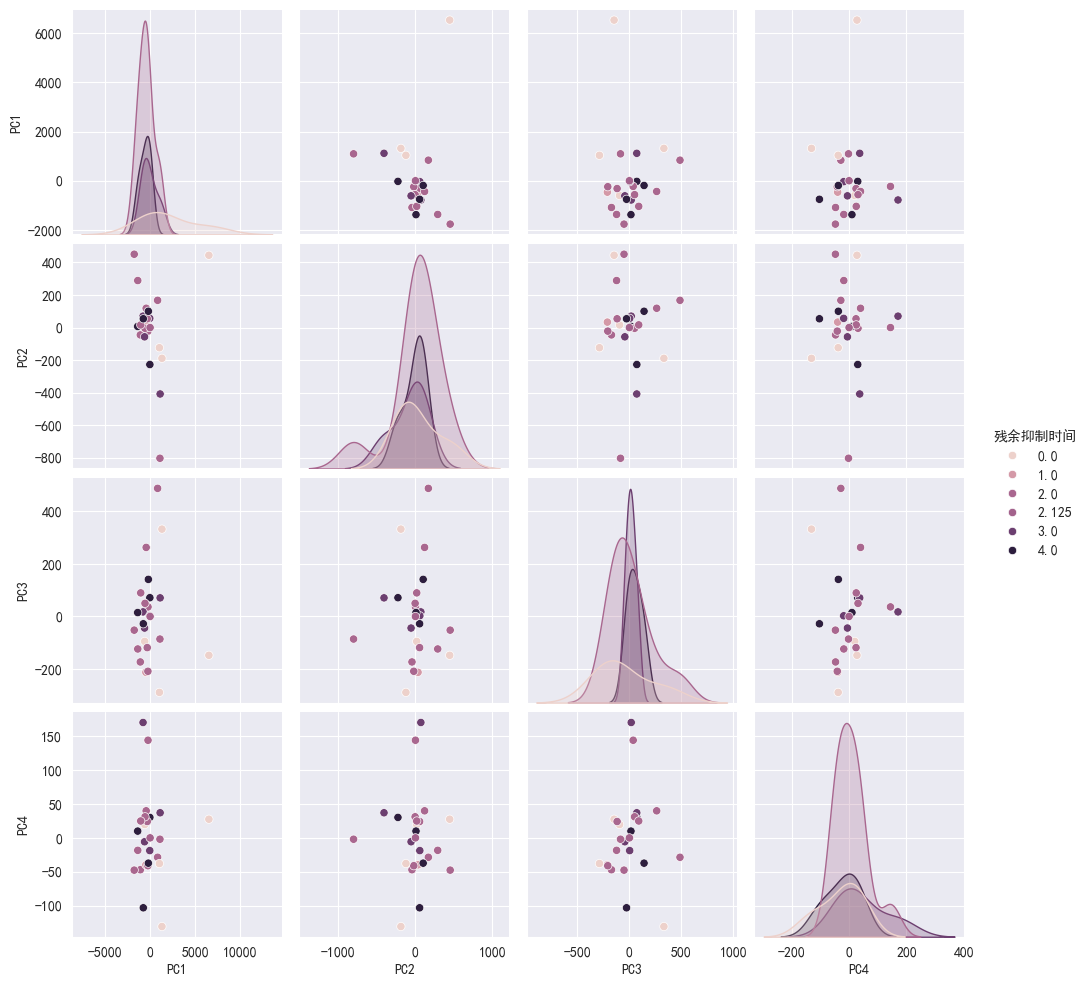

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib   
# matplotlib.use('TkAgg')

# 读取本地 Excel 文件
file_path = r'C:\Users\pc\Desktop\西交数据挖掘\相减后的数据.xlsx'  # 替换为你的 Excel 文件路径
df = pd.read_excel(file_path)

# 选择特征列和目标列
# 假设目标列为 '残余抑制时间' 和 'VAS评分'
feature_columns = ['RR-MEAN', 'RR-CV', 'RR-SDNN', 'RR-DRR', 'RRSSD', 'SDSD', 'NN50', 'PNN50', 'VLF', 'LF/HF', 'TP', 'LF', 'HF', 'LFNORM', 'HFNORM', 'VAI', 'VLI', 'SD1', 'SD2', '压力指数↓', '抗压指数↑', '情绪指数↓', '疲劳指数↓', '专注度↑', '放松度↑', '脑疲劳度↓', '平均心率（次/分）↓', '平均血氧↑', '灌注指数']
target_columns = ['残余抑制时间', 'VAS评分']

# 使用PCA进行降维
pca = PCA(n_components=4)
pca_result = pca.fit_transform(df[feature_columns])
df_pca = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(4)])

# 添加目标列到PCA结果中
for target in target_columns:
    df_pca[target] = df[target]

# 配置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 创建pairplot
sns.pairplot(df_pca, hue='残余抑制时间', diag_kind='kde', vars=[f'PC{i+1}' for i in range(4)])

# 显示图表
plt.show()